In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns

In [0]:
dados = pd.read_csv('./01_titanic/train.csv')

In [0]:
#dados.tail()

In [0]:
#dados.info()

In [0]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [0]:
dados['Sex'] = dados['Sex'].apply(sex)

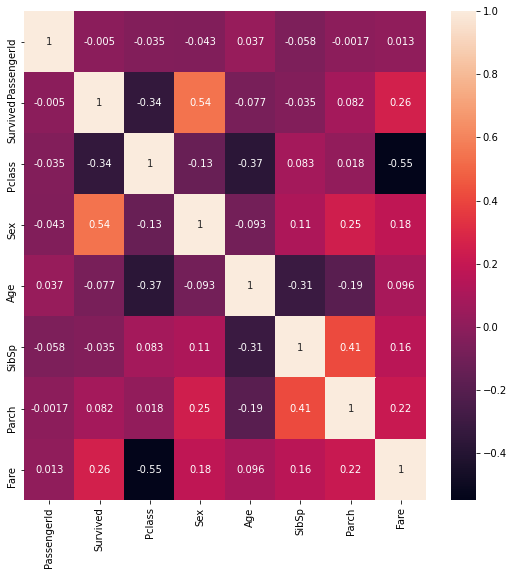

In [142]:
plt.figure(figsize = (9,9))
sns.heatmap(dados.corr(),annot = True)

In [0]:
dados = dados.drop(['Name','Parch','Ticket','Cabin',"Embarked",'Fare','SibSp'],axis =1)

In [144]:
dados.head(10)

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,0,35.0
5,6,0,3,0,NaN
6,7,0,1,0,54.0
7,8,0,3,0,2.0
8,9,1,3,1,27.0
9,10,1,2,1,14.0


In [145]:
dados

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,0,35.0
...,...,...,...,...,...
886,887,0,2,0,27.0
887,888,1,1,1,19.0
888,889,0,3,1,NaN
889,890,1,1,0,26.0


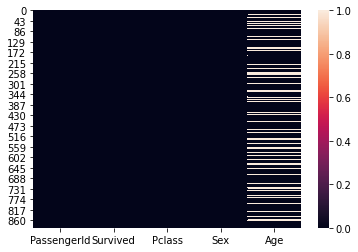

In [146]:
sns.heatmap(dados.isnull())

In [0]:
#Podemos retirar os dados que são NaN

dados = dados.dropna().reset_index().drop('index',axis=1)

In [148]:
"""# tudo que for NaN vira valor Médio
def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean())
        
    else:
        return x

    
dados['Age'] = dados['Age'].apply(media_age)"""

"# tudo que for NaN vira valor Médio\ndef media_age(x):\n    if np.isnan(x) == True :\n        return int(dados['Age'].mean())\n        \n    else:\n        return x\n\n    \ndados['Age'] = dados['Age'].apply(media_age)"

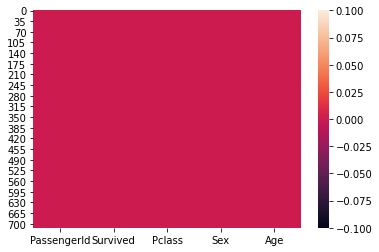

In [149]:
sns.heatmap(dados.isnull())

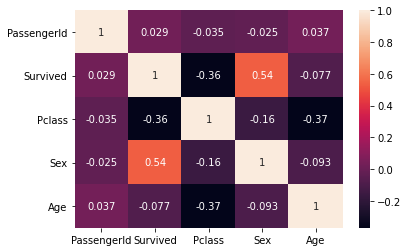

In [150]:
sns.heatmap(dados.corr(),annot = True)

In [0]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [152]:
X.shape,y.shape

((714, 4), (714, 1))

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [154]:
X.shape

(714, 4)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
)

In [157]:
X_train.shape,y_train.shape

((499, 4), (499, 1))

In [158]:
X_test.shape,y_test.shape

((215, 4), (215, 1))

In [0]:
def creat_model(n):
  model = tf.keras.models.Sequential()



  model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',
      input_shape = (X_train.shape[1],)
  ))

  model.add(tf.keras.layers.Dense(
      units = n*1,
      activation = 'relu',
      
  ))
  
  """
  model.add(tf.keras.layers.Dropout(0.05))

  model.add(tf.keras.layers.Dense(
      units = n*1,
      activation = 'relu',
      
  ))

  model.add(tf.keras.layers.Dropout(0.05))


  model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',
      
  ))"""



  model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid',
  ))

  #model.summary()

  model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


  return model

def treinar(model, epochs):

  history = model.fit(
      X_train,
      y_train,
      validation_split=0.1,
      epochs = epochs,
      shuffler = False,
      )
  return history

  #history.history.keys()

def cond(x):
    if x > 0.5:
      return 1
    else:
      return 0

def predict(X,y):

  pred_train = model.predict(X)
  pred_train.shape

  pred_df = pd.DataFrame()
  pred_df['pred'] = pred_train[:,0]

  pred_df['pred'] = pred_df['pred'].apply(cond)

  y_train_pred = y.join(pred_df)

  k = 0
  total = len(y_train_pred['pred'])

  for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
      if x == y:
          k = k+1
  p = k/total
  p_ = np.around(p*100,2)
  print(f"Porcentagem de Acerto {p_}%")
  return p_


In [191]:
v ={}
for n in range(8,30):
  model = creat_model(n)
  history= treinar(model,40)
  v[str(n)] = [predict(X_train,y_train),predict(X_test,y_test),history]


Epoch 1/40
15/15 [==============================] - 0s 7ms/step - loss: 0.7300 - accuracy: 0.3563 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5234 - val_loss: 0.6854 - val_accuracy: 0.5800
Epoch 3/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6192 - val_loss: 0.6686 - val_accuracy: 0.6000
Epoch 4/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6993 - val_loss: 0.6534 - val_accuracy: 0.7000
Epoch 5/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7372 - val_loss: 0.6488 - val_accuracy: 0.6800
Epoch 6/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7773 - val_loss: 0.6363 - val_accuracy: 0.7000
Epoch 7/40
15/15 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7884 - val_loss: 0.6269 - val_accuracy: 0.7000
Epoch 8/40
15/15 [==

In [192]:
v

{'10': [37.88,
  13.49,
 '11': [39.28,
  13.49,
 '12': [37.88,
  13.49,
 '13': [37.68,
  14.42,
 '14': [37.47,
  13.49,
 '15': [38.28,
  13.49,
 '16': [38.28,
  13.95,
 '17': [37.27,
  13.49,
 '18': [39.88,
  14.42,
 '19': [40.08,
  13.95,
 '20': [37.88,
  13.95,
 '21': [39.68,
  14.42,
 '22': [37.27,
  13.95,
 '23': [38.88,
  13.49,
 '24': [39.08,
  13.95,
 '25': [38.28,
  13.95,
 '26': [38.68,
  13.95,
 '27': [37.68,
  13.95,
 '28': [37.68,
  13.49,
 '29': [37.68,
  13.02,
 '8': [36.87,
  14.42,
 '9': [37.68,
  13.95,
  <tensorflow.python.keras.callbacks.History at 0x7f93fdef59b0>]}

In [0]:
def plot(history):

  plt.figure()
  plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
  plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
  plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
  plt.legend()
  plt.grid()

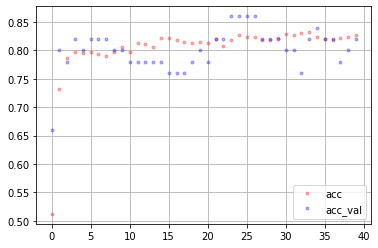

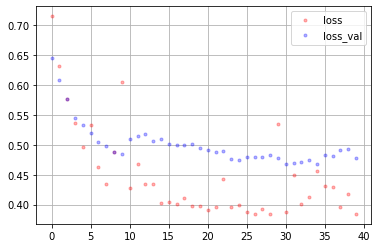

In [195]:
plot(v['19'][2])

## PREDIÇÕES

#### Dados de Treino